In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge


plt.rcParams.update({'font.size': 20})
import numpy as np

# Model order selection  

 
 We will try fitting a polynomial model to noisy data, where the true signal is a sinusoid. 
 

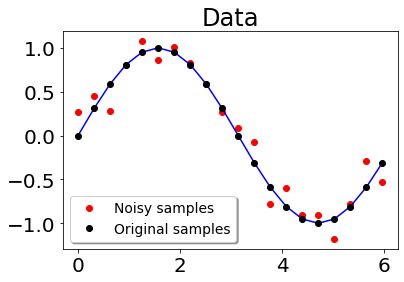

In [2]:
npoints = 20
sigma = 0.2
x = 2*np.pi*np.arange(npoints)/npoints
yorig = np.sin(x)

# Seeding the random number generator to get consistent results. You may change this
np.random.seed(seed=10)
y = yorig + sigma*np.random.normal(size=npoints)

fig = plt.figure()
ax = fig.gca()
cs = ax.plot(x, y,'ro',label='Noisy samples')
cs = ax.plot(x, yorig,'b')
cs = ax.plot(x,yorig,'ko',label='Original samples')
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-small')
s=plt.title('Data')


### Solving using polyfit (built-in function) with d=6

Polyfit fits a polynomial of degree d to the data to obtain the parameters

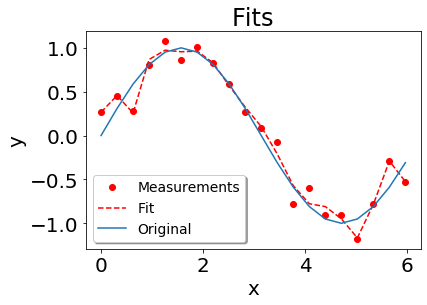

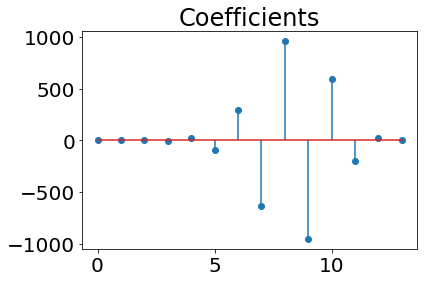

In [3]:
d = 13 # degree 1 polynomial
weights = np.polyfit(x,y,d)           # Last argument is degree of polynomial
f = np.polyval(weights,x)

# Plotting
fig1 =  plt.figure()
ax1 = fig1.gca()
s=ax1.plot(x, y,'ro',label='Measurements')
s=plt.plot(x,f,'r--',label='Fit')
s=plt.plot(x,yorig,label='Original')
s=plt.ylabel('y')
s=plt.xlabel('x')
legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-small')
plt.title('Fits')
plt.show()

fig2 =  plt.figure()
plt.stem(weights,use_line_collection=True)
s=plt.title('Coefficients')

## Plotting the fit error as a function of the model order

We will vary the model order and perform fitting, while evaluating the error in the fits. Note that the error decreases as the model order increases. Polyfit will spit out warnings with increasing d as the matrix $\mathbf X^T\mathbf X$ becomes closer to non-invertible. 
<font color=red> You should pay attention to the warnings since the fits may be poor. You need to choose a lower model order or add regularization. </font>

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


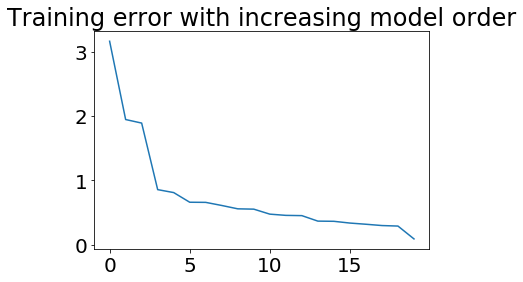

In [4]:
err_array = []
for d in range(20):
    weights = np.polyfit(x,y,d)           
    f = np.polyval(weights,x)
    err_array.append(np.linalg.norm(f-y))
    
s=plt.plot(err_array)
s=plt.title("Training error with increasing model order")


## <font color=red> Validation for model order selection</font>

You will split the training data to validation data and fitting data. The fit will be performed using the fitting data. Store the training errors and validation errors and plot. Determine the optimal model order from the plots as the minimum of the validation error.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


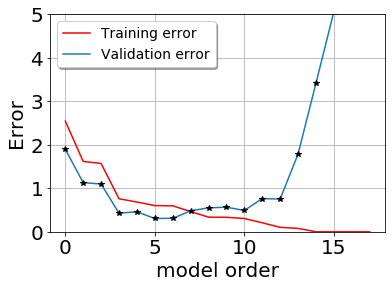

In [5]:
# Random splitting routine from scikit_learn
x_train, x_validation , y_train, y_validation = train_test_split(x, y, test_size=0.25,random_state=32)

train_err_array = []
validation_err_array = []

fig3 = plt.figure()
ax3 = fig3.gca()

for model_order in range(18):
    weights = np.polyfit(x_train,y_train,model_order)           
    f_train = np.polyval(weights,x_train)
    train_err_array.append(np.linalg.norm(f_train-y_train))
    f_validation = np.polyval(weights,x_validation)
    validation_err_array.append(np.linalg.norm(f_validation-y_validation))
    
s=plt.plot(train_err_array,'r',label='Training error')
s=plt.plot(validation_err_array,label='Validation error')
s=plt.plot(validation_err_array,'k*')
s = plt.xlabel('model order')
s = plt.ylabel('Error')
s = plt.ylim([0,5])

s = plt.grid()
legend = ax3.legend(loc='upper left', shadow=True, fontsize='x-small')
plt.show()


<font color=red>Pick the model order that gives you the minimum validation error and evaluate the fit to the data. Show the fit as well </font>

In [6]:
# YOUR CODE HERE

# Plotting
fig1 =  plt.figure()
ax1 = fig1.gca()
s=ax1.plot(x, y,'ro',label='Measurements')
s=plt.plot(x,f_optimal_model_order,'r--',label='Optimal fit')
s=plt.plot(x,yorig,label='Original')
s=plt.ylabel('y')
s=plt.xlabel('x')
legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-small')
plt.title('Optimal model order fit')
plt.show()

fig2 =  plt.figure()
plt.stem(weights,use_line_collection=True)
s=plt.title('Coefficients')

NameError: name 'f_optimal_model_order' is not defined